In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
url = '../processed_data/output.csv'
df = pd.read_csv(url, index_col = 'year', parse_dates=True, infer_datetime_format=True)
df = df.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, ignore_index=False, key=None)
df.head()

,country,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_gdp,gdp_per_capita,generation,...,physician_price,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,continent,country_code,mobilesubscription
year,,,,,,,,,,,,,,,,,,,,,
1985-01-01,Argentina,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,G.I. Generation,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Americas,ARG,0.0
1985-01-01,Mexico,female,15-24 years,107,8211000,1.30,Mexico1985,1.844730e+11,2730,Generation X,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Americas,MEX,0.0
1985-01-01,Mexico,female,75+ years,7,563000,1.24,Mexico1985,1.844730e+11,2730,G.I. Generation,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Americas,MEX,0.0
1985-01-01,Mexico,female,25-34 years,61,5661000,1.08,Mexico1985,1.844730e+11,2730,Boomers,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Americas,MEX,0.0
1985-01-01,Mexico,female,35-54 years,55,6100000,0.90,Mexico1985,1.844730e+11,2730,Silent,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Americas,MEX,0.0


In [5]:
countries=df['country'].unique()
countries

array(['Argentina', 'Mexico', 'Netherlands', 'Austria', 'Italy',
       'Belgium', 'Japan', 'Chile', 'Australia', 'Spain', 'Thailand',
       'New Zealand', 'Portugal', 'Colombia', 'France', 'Bulgaria',
       'Greece', 'Canada', 'Ireland', 'Israel', 'Brazil', 'Iceland',
       'Norway', 'Turkmenistan', 'Sweden', 'Ukraine', 'Finland',
       'Russian Federation', 'Romania', 'Poland', 'Czech Republic',
       'Germany', 'Armenia', 'Hungary', 'Cuba', 'Denmark', 'Switzerland',
       'Croatia', 'South Africa'], dtype=object)

In [13]:
columns = ['sucid_in_hundredk','gdp_per_capita','suicides', 'population', 'lifeexpectancy']

In [14]:
#fig, axes = plt.subplots(nrows=8, ncols=int(len(countries)/7), figsize=(40,32), sharex=True, sharey=True)
#ax = axes.flatten()
for i, country in enumerate(countries):
  print("Creating a time series for country ",country," with parameter ", columns)
  country_df = df[(df.country == country)]
  country_with_columns = pd.DataFrame(country_df, columns=columns)
  # adding all deaths together and group by year
  country_with_columns = country_with_columns.groupby(['year'])[columns].transform('sum')
  #country_with_columns = pd.Series.to_frame(country_with_columns)
  country_with_columns['year'] = list(country_with_columns.index)
  country_with_columns = country_with_columns.drop_duplicates()
  country_with_columns = country_with_columns.drop(labels='year', axis=1)


  
  #ax[i].plot(country_with_columns)
  #ax[i].set_title(str(country), loc = 'center')
  #ax[i].set_xlabel("year")
  #ax[i].set_ylabel(str(columns[i]))

  country_with_columns.to_csv('../processed_data/country_wise/data/'+str(country)+'.csv')
print("All files are written in the directory.")
print("\n"*5)
#plt.show()


Creating a time series for country  Argentina  with parameter  ['sucid_in_hundredk', 'gdp_per_capita', 'suicides', 'population', 'lifeexpectancy']
Creating a time series for country  Mexico  with parameter  ['sucid_in_hundredk', 'gdp_per_capita', 'suicides', 'population', 'lifeexpectancy']
Creating a time series for country  Netherlands  with parameter  ['sucid_in_hundredk', 'gdp_per_capita', 'suicides', 'population', 'lifeexpectancy']
Creating a time series for country  Austria  with parameter  ['sucid_in_hundredk', 'gdp_per_capita', 'suicides', 'population', 'lifeexpectancy']
Creating a time series for country  Italy  with parameter  ['sucid_in_hundredk', 'gdp_per_capita', 'suicides', 'population', 'lifeexpectancy']
Creating a time series for country  Belgium  with parameter  ['sucid_in_hundredk', 'gdp_per_capita', 'suicides', 'population', 'lifeexpectancy']
Creating a time series for country  Japan  with parameter  ['sucid_in_hundredk', 'gdp_per_capita', 'suicides', 'population', 'l

### grid search ARIMA parameters for time series

In [15]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import dateutil.parser # for handling the conversion of datetime formats
from datetime import timedelta # for operating the datetime objects
from statsmodels.tsa. statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# evaluate an SARIMA model for a given order (p,d,q)
def evaluate_sarima_model(X, arima_order):

    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()

    for t in range(len(test)):
        model = SARIMAX(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None

    for p in p_values:

        for d in d_values:

            for q in q_values:

                order = (p,d,q)
                try:
                    rmse = evaluate_sarima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    #print('SARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue

        #print('Best SARIMA%s RMSE=%.3f' % (best_cfg, best_score))

    print('Best SARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg, best_score


# function to check if the year is leap year or not
def is_leap_year(year):

    if (year%4) == 0:
        if (year%100) == 0:
            if (year%400) == 0:
                return True
            else:
                return False
        else:
             return True
    else:
        return False

def forecasted_series_to_df(series, forecasted_series_, npast_year, name_of_forecasted_column, name_of_datetime_index_column):
  forecasted_series = forecasted_series_.copy()
  y = 0
  index_for_forcaste = []
  index_for_forcaste.append(series.index[-npast_year-1])
  for i in range(len(forecasted_series)-1):
    y = y+1
    date_temp = index_for_forcaste[-1]
    if(is_leap_year(date_temp.year)):
      date_temp = date_temp + timedelta(days = 366)
    else:
      date_temp = date_temp + timedelta(days = 365)
    index_for_forcaste.append(date_temp)

  forecasted_series.index = pd.to_datetime(index_for_forcaste)
  forecasted_series = pd.DataFrame({name_of_datetime_index_column:forecasted_series.index, name_of_forecasted_column:forecasted_series.values})
  forecasted_series.index = forecasted_series[name_of_datetime_index_column]
  forecasted_series = forecasted_series.drop(name_of_datetime_index_column, axis = 1)

  return forecasted_series



def forecast(country,npast_year = 0, nforecast_year = 5):

    series = read_csv('../processed_data/country_wise/data/'+str(country)+'.csv', header=0, index_col=0, parse_dates=True)
    first_time = True
    for parameter_to_forecast in series.columns:
        if parameter_to_forecast == 'year':
            pass
        else:
            # evaluate parameters
            p_values = [0, 1, 2, 4, 6, 8,10]
            d_values = range(0, 5)
            q_values = range(0, 5)
            
            tdf = series[parameter_to_forecast].copy()
            tdf.index = series.index
            tdf = tdf.squeeze()
           
            # selecting best model using grid search
            best_cfg, best_score = evaluate_models(tdf.values, p_values, d_values, q_values)
            # Instantiate the model
           
            model = SARIMAX(series[parameter_to_forecast], order=best_cfg)

            # Fit the model
            results = model.fit()

            # Generate predictions
            forecasts = results.get_prediction(start=len(series)-npast_year-1,end = len(series)+nforecast_year-1)

            # Extract prediction mean
            mean_forecast_sarima = forecasts.predicted_mean

            # printing some summury and forecast
            #print(mean_forecast_arima)
            print(results.summary())

            to_plot=forecasted_series_to_df(series[parameter_to_forecast], mean_forecast_sarima, npast_year, str(parameter_to_forecast), "year")
            if first_time:
                first_time = False
                temp = to_plot.copy()
            else:
                temp=pd.merge(to_plot, temp, on = "year", how = 'right')

    # writting forecastes to the hard-disk
    temp.to_csv('../processed_data/country_wise/forecasted/'+str(country)+'.csv')

    return temp, series
  

In [ ]:
##############################################################
  ################ Implementations ########################
##############################################################

for i, country in enumerate(countries):
    to_plot, series = forecast(country = country, npast_year = 0, nforecast_year = 15)





Best SARIMA(1, 1, 2) RMSE=15.285
                               SARIMAX Results                                
Dep. Variable:      sucid_in_hundredk   No. Observations:                   31
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -136.089
Date:                Mon, 08 Aug 2022   AIC                            280.179
Time:                        15:12:18   BIC                            285.784
Sample:                    01-01-1985   HQIC                           281.972
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5105      0.439     -1.162      0.245      -1.372       0.351
ma.L1          0.0296      0.356      0.083      0.934      -0.668       0.727
ma.L2         -0.59

Best SARIMA(0, 1, 2) RMSE=5.538
                               SARIMAX Results                                
Dep. Variable:      sucid_in_hundredk   No. Observations:                   31
Model:               SARIMAX(0, 1, 2)   Log Likelihood                 -97.924
Date:                Mon, 08 Aug 2022   AIC                            201.847
Time:                        15:29:56   BIC                            206.051
Sample:                    01-01-1985   HQIC                           203.192
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8130      0.226     -3.604      0.000      -1.255      -0.371
ma.L2          0.2498      0.212      1.180      0.238      -0.165       0.665
sigma2        39.161

Best SARIMA(4, 1, 4) RMSE=127.397
                               SARIMAX Results                                
Dep. Variable:         lifeexpectancy   No. Observations:                   31
Model:               SARIMAX(4, 1, 4)   Log Likelihood                -179.267
Date:                Mon, 08 Aug 2022   AIC                            376.534
Time:                        15:42:45   BIC                            389.145
Sample:                    01-01-1985   HQIC                           380.569
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3411      1.681     -0.203      0.839      -3.636       2.954
ar.L2         -0.6078      2.043     -0.298      0.766      -4.612       3.396
ar.L3         -0.2

Best SARIMA(1, 3, 3) RMSE=112.920
                               SARIMAX Results                                
Dep. Variable:         lifeexpectancy   No. Observations:                   32
Model:               SARIMAX(1, 3, 3)   Log Likelihood                -175.828
Date:                Mon, 08 Aug 2022   AIC                            361.655
Time:                        16:02:16   BIC                            368.492
Sample:                    01-01-1985   HQIC                           363.796
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1841      1.678     -0.110      0.913      -3.472       3.104
ma.L1         -1.9468     31.480     -0.062      0.951     -63.647      59.753
ma.L2          0.9

Best SARIMA(1, 0, 4) RMSE=106.015
                               SARIMAX Results                                
Dep. Variable:         lifeexpectancy   No. Observations:                   32
Model:               SARIMAX(1, 0, 4)   Log Likelihood                -189.434
Date:                Mon, 08 Aug 2022   AIC                            390.867
Time:                        16:20:52   BIC                            399.662
Sample:                    01-01-1985   HQIC                           393.782
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9954      0.035     28.838      0.000       0.928       1.063
ma.L1          0.0677      0.331      0.205      0.838      -0.581       0.716
ma.L2          0.1

Best SARIMA(8, 0, 4) RMSE=103.853
                               SARIMAX Results                                
Dep. Variable:         lifeexpectancy   No. Observations:                   31
Model:               SARIMAX(8, 0, 4)   Log Likelihood                -185.036
Date:                Mon, 08 Aug 2022   AIC                            396.073
Time:                        16:39:02   BIC                            414.715
Sample:                    01-01-1985   HQIC                           402.150
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3073      3.125     -0.098      0.922      -6.432       5.818
ar.L2          0.0821      2.151      0.038      0.970      -4.134       4.299
ar.L3         -0.2

Best SARIMA(2, 3, 2) RMSE=32969.725
                               SARIMAX Results                                
Dep. Variable:             population   No. Observations:                   31
Model:               SARIMAX(2, 3, 2)   Log Likelihood                -359.467
Date:                Mon, 08 Aug 2022   AIC                            728.933
Time:                        16:54:06   BIC                            735.594
Sample:                    01-01-1985   HQIC                           730.970
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6174      0.565     -2.864      0.004      -2.724      -0.511
ar.L2         -0.6323      0.359     -1.761      0.078      -1.336       0.071
ma.L1         -0

Best SARIMA(0, 1, 0) RMSE=38611617.098
                               SARIMAX Results                                
Dep. Variable:             population   No. Observations:                   31
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -555.304
Date:                Mon, 08 Aug 2022   AIC                           1112.608
Time:                        17:09:44   BIC                           1114.009
Sample:                    01-01-1985   HQIC                          1113.056
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.772e+14   8.19e+13      8.268      0.000    5.17e+14    8.38e+14
Ljung-Box (L1) (Q):                   4.91   Jarque-Bera (JB):                54.89
Prob(Q):

Best SARIMA(0, 3, 1) RMSE=3964.526
                               SARIMAX Results                                
Dep. Variable:             population   No. Observations:                   31
Model:               SARIMAX(0, 3, 1)   Log Likelihood                -361.356
Date:                Mon, 08 Aug 2022   AIC                            726.713
Time:                        17:29:13   BIC                            729.377
Sample:                    01-01-1985   HQIC                           727.527
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8987      0.056    -16.174      0.000      -1.008      -0.790
sigma2      1.426e+10   5.99e-14   2.38e+23      0.000    1.43e+10    1.43e+10
Ljung-Box (L1) (Q

Best SARIMA(10, 1, 2) RMSE=153001.982
                               SARIMAX Results                                
Dep. Variable:             population   No. Observations:                   30
Model:              SARIMAX(10, 1, 2)   Log Likelihood                -375.311
Date:                Mon, 08 Aug 2022   AIC                            776.622
Time:                        17:48:31   BIC                            794.396
Sample:                             0   HQIC                           782.188
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0024      0.806      0.003      0.998      -1.577       1.582
ar.L2          0.9928      0.787      1.262      0.207      -0.549       2.535
ar.L3         

Best SARIMA(0, 1, 2) RMSE=532.099
                               SARIMAX Results                                
Dep. Variable:               suicides   No. Observations:                   31
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -217.848
Date:                Mon, 08 Aug 2022   AIC                            441.697
Time:                        18:02:54   BIC                            445.900
Sample:                    01-01-1985   HQIC                           443.042
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1701      7.045     -0.024      0.981     -13.979      13.639
ma.L2         -0.8276      5.927     -0.140      0.889     -12.444      10.789
sigma2       1.02e

Best SARIMA(0, 1, 0) RMSE=10980.943
                               SARIMAX Results                                
Dep. Variable:         gdp_per_capita   No. Observations:                   28
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -280.078
Date:                Mon, 08 Aug 2022   AIC                            562.157
Time:                        18:15:32   BIC                            563.453
Sample:                             0   HQIC                           562.542
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.775e+07   1.44e+07      4.022      0.000    2.96e+07    8.59e+07
Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):                 4.14
Prob(Q):   

Best SARIMA(8, 1, 2) RMSE=39518.021
                               SARIMAX Results                                
Dep. Variable:         gdp_per_capita   No. Observations:                   29
Model:               SARIMAX(8, 1, 2)   Log Likelihood                -321.221
Date:                Mon, 08 Aug 2022   AIC                            664.441
Time:                        18:29:01   BIC                            679.095
Sample:                    01-01-1985   HQIC                           668.921
                         - 01-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0287      0.501      2.052      0.040       0.046       2.011
ar.L2         -0.6785      0.744     -0.912      0.362      -2.136       0.779
ar.L3          0

### Dicky-Fuller test on one series

Null Hypothesis H0 : The dataset is non-stationary 

Alternate Hypothesis : Dataset is stationary

In [8]:
# test for testing non-stationrary using dicky fuller test using stat models

from statsmodels.tsa.stattools import adfuller
russia = df[(df.country == "Russian Federation")]
results = adfuller(russia[columns[0]])
print(results)

(-8.045088152876229, 1.8035333298131911e-12, 1, 153, {'1%': -3.473829775724492, '5%': -2.880622899711496, '10%': -2.5769448985432954}, 1279.9181169754406)


##### Interpretation

Above result is a tuple.
Zeroth Elemenet is test statisctic in this case -8.045, the more the number is negative more the data is stationary
Next element is the P value, here it's 1.8035

If P value is less than 0.05 we reject the null hypothesis.
We assume that our time series is stationary

In this case, we fail to reject the null hypothesis. so we can say our time series is <b>non-stationary</b>.


last item in the tuple is a dictionary, this stores the critical values of the test, which creates different p values. in this case if you want the p value 0.05 or less, test statistics needed to be below -2.57. 

<p style="background-color:green;">Now we need to make it stationary by using </p>

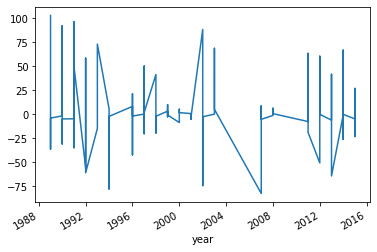

In [9]:
# Making Time Series by taking the difference.

rsa_stationary = russia[columns[0]].diff()
rsa_stationary = rsa_stationary.dropna()      # removing the na value from the first row

fig, ax = plt.subplots()
rsa_stationary.plot(ax=ax)
plt.show()

In [10]:
rsa_stationary.head()

year
1989-01-01    102.81
1989-01-01    -36.63
1989-01-01     -0.02
1989-01-01    -12.82
1989-01-01    -18.39
Name: sucid_in_hundredk, dtype: float64

Even though we can use different methods to make the data stationary. I have successfully used "taking the difference" methods, now the data looks stationary.

we always set lag 0 coefficiant as 1 for both lag 1 -0.5 and 0.2 accordingly

### ARMAX Model

In [ ]:

train_size = int(len(russia) * 0.66)
russia_train, russia_test = russia[0:train_size], russia[train_size:]

In [ ]:
russia_train.head()

We have fitted the models above. now we need to make predictions

One Step Ahead Predictions

### Statmodels using SARIMAX class (One Step Prediction)

For ex AR1 Model : At any point in the time series, we can estimate the next series value, by multiplying the previous value by the lag1 AR coefficient.

Predicting next series using the previous series value is called as one step prediction. This allows us to evaluate how good our model is.

In [ ]:
russia.tail()

In [ ]:
from statsmodels.tsa. statespace.sarimax import SARIMAX

npast_year = 0
nforecast_year = 10

# An ARMA(p, q) + constant model
model = SARIMAX(russia, order=(2,1, 1), trend='c')

results = model.fit()

# Generate predictions
one_step_forecast = results.get_prediction(start=len(russia)-npast_year-1,end = len(russia)+nforecast_year-1)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

print(mean_forecast)

Here I am making predictions based on last 30 entries of the training data.

In above case, center value of the forecast is stored in predicted_mean

This model can do everything a ARIMA model and can be extended further. p,0,q sarimax model is exact same arima pq model. we can also add a constant to the model using trend = c.

In [ ]:
# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

print(confidence_intervals.head(2))

In [ ]:
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower sucid_in_hundredk']
upper_limits = confidence_intervals.loc[:,'upper sucid_in_hundredk']

mean_forecast = forecasted_series_to_df(russia, mean_forecast,npast_year, "sucid_in_hundredk","year")

# Print best estimate predictions
# print(mean_forecast)

plt.figure(figsize =(20,8))

plt.plot(russia.index, russia ,label='observed')
# Plot prediction

plt.plot(mean_forecast.index, mean_forecast,color='r' ,label='forecast')
# Shade uncertainty area
plt.fill_between(mean_forecast.index, lower_limits, upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Suicide in 100k')
plt.legend()

### Making a NAN value future dataset.

##### Confidence intervals

In [ ]:
confidence_intervals = one_step_forecast.conf_int()
confidence_intervals.head(10)

Above dataframe shows the lower and upper uncertainity range of our prediction

Reconstructing original time series after diffrencing

In [ ]:
diff_forecast = results.get_forecast(steps=10).predicted_mean
from numpy import cumsum
mean_forecast = cumsum(diff_forecast)

mean_forecast.head(2)

##### Identifying the correct order by ACF and PCF (When both the order p and q are no-zero)

In [ ]:
# Create model
model = SARIMAX(russia, order=(2,1,1))
#Fit model
model.fit()
# Make forecast
mean_forecast = results.get_forecast(steps=10).predicted_mean

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Create figure
fig, (ax1, ax2) = plt.subplots (2,1,figsize=(8,8))
# Make ACF plot
plot_acf(russia,lags=10, zero=False, ax=ax1)
# Make PACF plot
plot_pacf(russia, lags=10, zero=False, ax=ax2)

plt.show()

In the above ACF and PACF, we can see ACF cuts of and PACF tails off since we have a MA(q) model. So this is a AR(1) Model

In [ ]:
# Instantiate model
model = SARIMAX(russia, order =(1,0,0))

# Train model
results = model.fit()

print(results.summary())

### Checking how good the model is using AIC and BIC

Lower AIC Score means : better predicting model
If the Corder is set too high result in high AIC value, this stops us overfitting to the training data

BIC is similar to AIC, lower BIC indicates bettr model. BIC likes to choose simple model with lower order.

AIC is better at predictive models but BIC is choosing a good explanatory model

In [ ]:
print('AIC:', results.aic)
print('BIC:', results.bic)

In [ ]:
order_aic_bic =[]
# Loop over AR order
for p in range(3):
    # Loop over MA order
    for q in range(3):
        # Fit model
        model = SARIMAX(russia, order=(p,0,q))
        results = model.fit()
        # Add order and scores to list
        order_aic_bic.append((p, q, results.aic, results.bic))

# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p','q','aic','bic'])

# Sort by AIC
print(order_df.sort_values('aic'))

In [ ]:
# Sort by BIC
print(order_df.sort_values('bic'))

Here I am looking at a better predicting model so, I will be choosing AIC with a least score. This is a arma(2,0) Model

In [ ]:
# Fit model
model = SARIMAX(russia, order=(2,0,0))
results = model.fit()
print(results.summary())

### Model Diagrnostic

In [ ]:
#How good the final Model ?

# Fit model
model = SARIMAX(russia, order=(p,0,q))
results = model.fit()
# Assign residuals to variable
residuals = results.resid

print(residuals)


Mean abosolute error of the residuals is used to calculate how accurate our model is. How large our residuals are and how far our predictions are from the actual values.

In [ ]:
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error is', mae)

In [ ]:
# Make plot of time series for comparison
russia.plot()
plt.show()

If the model fits well, then residuals will be white
Gaussian noise

In [ ]:
# russia.index.duplicated()
# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

Looking at the plots I can say there is no pattern in the stardized model. 
Looking at the Histogram there is no gaussian distribution(green and red line should be almost the same for gaussian)
The QQ Plot seems to be not normally distributed, if it is normally distributed all the blue dots will be aligned over the line(except some values in the either end)

Last one is correlogram just an ACF Plot.

As per the summery Statistics.

Prob(Q) - p-value for null hypothesis that residuals are uncorrelated
Prob(JB) - p-value for null hypothesis that residuals are normal

either p value less than 0.05 we reject the null hypothesis. 

As per the test statistics we have in our time series, p value are higher than 0.05, so we fail to reject the null hypothesis.

#### Box Jenkins Method

In [ ]:
# Plot time series
russia.plot()
plt.show()

# Run Dicky-Fuller test
result = adfuller(russia['sucid_in_hundredk'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

### Automation using PMD Arima Package

In [ ]:
!pip install pmdarima

import pmdarima as pm
results = pm.auto_arima(russia)
print(results.summary())

In [ ]:
# Import
import joblib

# Select a filepath
filepath ='/content/drive/MyDrive/ireland/ireland/dissertation_dkit_msc_2022_sep-master/great_model.pkl'

# Save model to filepath
joblib.dump(results, filepath)

In [ ]:
russia.shape

In [ ]:
russia = pd.read_csv('russia.csv', names=['value'], header=0)

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = russia.value[:14]
test = russia.value[14:]

In [ ]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(2,0,0))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(14, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.xticks(rotation = 45)
plt.legend(loc='upper left', fontsize=8)
plt.show()
